In [16]:
import numpy as np

from skimage import io
from skimage import util
from scipy import ndimage
from skimage import morphology
from skimage import segmentation
from skimage.feature import peak_local_max
from skimage.measure import regionprops
from skimage.morphology import watershed, black_tophat

In [12]:
image = io.imread('a-17001-40x-mac-05_gt.png')

image = util.invert(image)

image = np.logical_or(image,0)

distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)

markers = morphology.label(local_maxi)
local_ws = watershed(-distance, markers, mask=image)

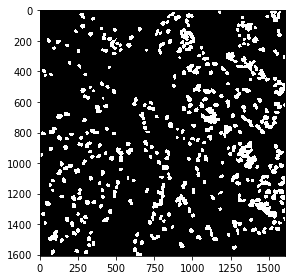

C:\Users\Daniers\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


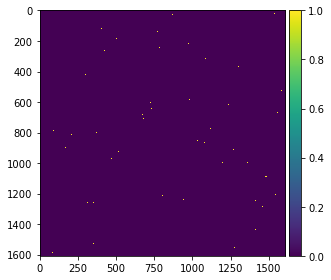

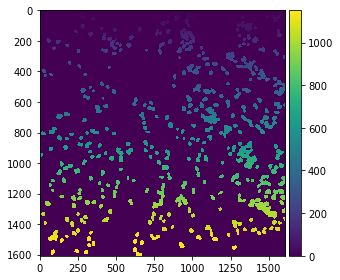

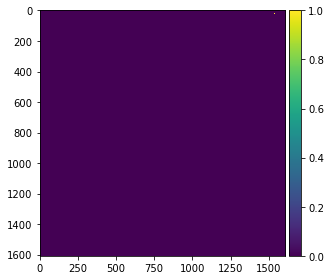

In [14]:
io.imshow(image)
io.show()

io.imshow(local_maxi)
io.show()

io.imshow(local_ws)
io.show()

io.imshow(local_ws==7)
io.show()

# PROPIEDADES

In [37]:
props=regionprops(local_ws)
print(props[5].centroid)
print(props[5].area)
print(len(props))

(15.190217391304348, 1567.179347826087)
184
1151
